# Reading data from CSV file and Annotating Continuous Data

# Loading CSV file
    - Use pd.read_csv function to load data
    - Call transpose since mne expects channels to be formatted as rows
    - set sample frequency 
    - set meas_date date to 0 to avoid Ambiguous operation error

## Plotting Events `events.txt`
    - First column measures sample, second column is place holder, third column is label

## Plotting Annotations
    - First column is onset, seconds column is duration, third column is label
    - [Events](https://mne.tools/stable/glossary.html#term-events)
    - [read_events()](https://mne.tools/stable/generated/mne.read_events.html#mne-read-events)
    - [Work around for `RuntimeError: Ambiguous operation` (read_annotations) -> raw.set_meas_date(0) ](https://github.com/mne-tools/mne-python/issues/5908#issuecomment-461865564)
    - [Read Annotations](https://mne.tools/stable/generated/mne.read_annotations.html#mne-read-annotations)

# Creating epochs from raw data
[https://mne.tools/stable/auto_tutorials/epochs/10_epochs_overview.html#creating-epoched-data-from-a-raw-object](https://mne.tools/stable/auto_tutorials/epochs/10_epochs_overview.html#creating-epoched-data-from-a-raw-object)

## Additional Resources
[https://fooof-tools.github.io/fooof/auto_examples/analyses/plot_mne_example.html](https://fooof-tools.github.io/fooof/auto_examples/analyses/plot_mne_example.html)
[https://notebook.community/mne-tools/mne-tools.github.io/0.14/_downloads/plot_objects_from_arrays](https://notebook.community/mne-tools/mne-tools.github.io/0.14/_downloads/plot_objects_from_arrays)
[https://mne.discourse.group/](https://mne.discourse.group/)

In [257]:
import torch
import pandas as pd 
import mne
import numpy as np
import matplotlib.pyplot as plt

def csvToRaw(file, channels):
    data = pd.read_csv('eyes_open.csv', usecols = [i+1 for i in range(channels)]).transpose()
    sfreq = 256
    ch_names = ['CP3', 'C3', 'F5',  'PO3', 'PO4', 'F6', 'C4',  'CP4' ]
    ch_types = ['eeg', 'eeg', 'eeg', 'eeg', "eeg", "eeg", "eeg", "eeg"]
    info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types=ch_types )
    raw = mne.io.RawArray(data, info)
    raw.apply_function(lambda x: x * 1e-6)
    raw.set_meas_date(0)
    raw.set_montage("standard_1020")
    eeg_reref, _ = mne.io.set_eeg_reference(raw)
    return eeg_reref

def getEpochs(raw, events, event_dict):
    epochs = mne.Epochs(eeg_reref, events, tmin=-0.3, tmax=0.7, event_id=event_dict)
    return epochs

def visualize(event_dict, eventTitle, epochs):
    print(f"------{eventTitle}------")
    epochs.plot()
    spectrum = epochs.compute_psd()
    spectrum.plot()
    spectrum.plot(average=True)
    spectrum.plot_topomap()

# Plot custom events
# events = mne.read_events("events.txt") 
# raw.plot(events=events)
# Plot custom Annotations
# annot_from_file = mne.read_annotations('saved-annotations2.csv')
# raw.set_annotations(annot_from_file)
# raw.plot()
# raw = raw.copy().crop(tmin=1, tmax=4)
# mne.viz.plot_raw(raw, events = events, n_channels=8, scalings="auto", clipping=None, start=0, duration=10.0)
# worked after doing pip install mne and opening basic python file and running python mne.py (test file)

Creating RawArray with float64 data, n_channels=8, n_times=2368
    Range : 0 ... 2367 =      0.000 ...     9.246 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
8 matching events found
Setting baseline interval to [-0.30078125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
------eyes open------
Using data from preloaded Raw for 6 events and 257 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Averaging across epochs...


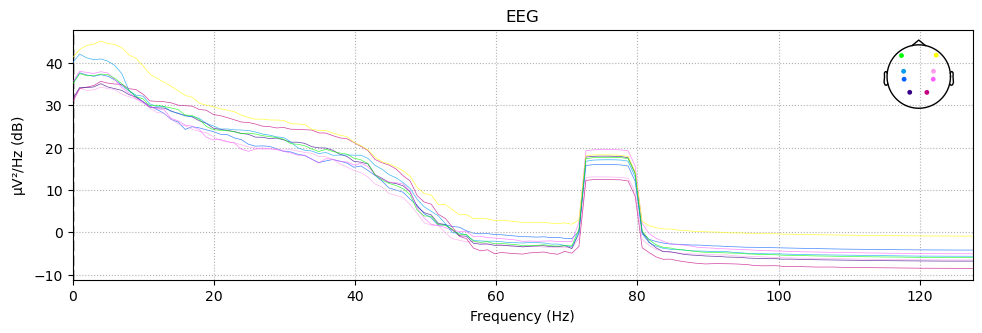

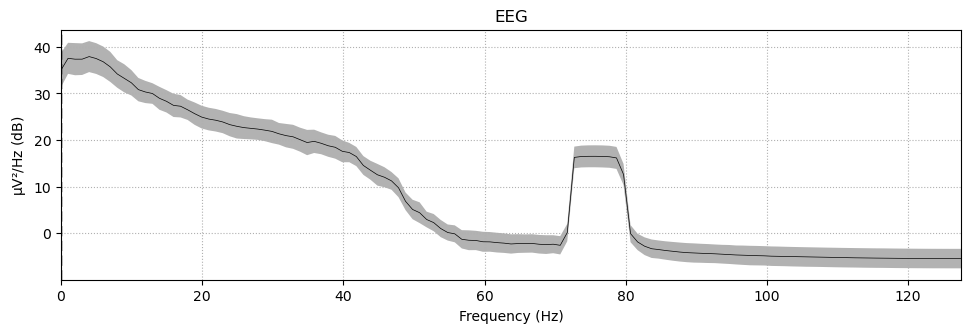

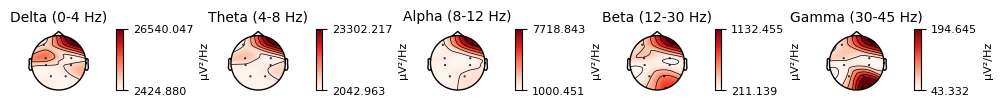

In [256]:
# Setting sensor location and Power Spectrum


# Eyes Open
raw = csvToRaw("eyes_open.csv", 8)
# Equally Spaced Events
events = mne.make_fixed_length_events(raw, start=1, stop=10, duration=1.)
event_dict = {'open': 1}
epochs = getEpochs(raw, events, event_dict)
#epochs = epochs[1,2,3,5,6,7]
visualize(event_dict, "eyes open", epochs)


########################################

# Eyes Closed
raw = csvToRaw("eyes_closed.csv", 8)
# Equally Spaced Events
events = mne.make_fixed_length_events(raw, start=1, stop=10, duration=1.)
event_dict = {'closed': 1}
epochs = getEpochs(raw, events, event_dict)
epochs = epochs[1,2,3,5,6,7]
visualize(event_dict, "eyes closed", epochs)


# epochs.plot()
# spectrum = epochs.compute_psd()
# spectrum.plot_topomap()``
# mne.viz.plot_epochs(epochs, scalings='auto', title="Open")
# fig = raw.plot_sensors(show_names=True)
# spectrum = raw.compute_psd()
# spectrum.plot(average=True)
# spectrum.plot()
# spectrum.plot_topo(color='k', fig_facecolor='w', axis_facecolor='w')
# spectrum.plot_topomap(ch_type='eeg',vmin=16, vmax=26)
# mne.viz.plot_topomap(raw, raw.info, cmap='Spectral_r',sensors = True,vmin=16, vmax=26)